# Visuals

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# Paths to data directories
cwd_path = Path.cwd()
data_path = cwd_path.parent.joinpath('data')
data_push_path = cwd_path.parent.joinpath('data_to_push')

#### Read in data

In [17]:
df_turbines = pd.read_pickle(data_push_path / 'df_turbines_knn_blades_haversine_elevation_utc_2_2018_2023.pkl')
used_grid_points = df_turbines['nearest_grid_point'].unique()

In [4]:
ds = xr.open_dataset(data_path.joinpath('ERA5').joinpath('era5_combined_subset_derived_dropped_masked_2018_2023.nc'))

In [5]:
ds

<xarray.Dataset>
Dimensions:                    (time: 48168, latitude: 30, longitude: 37)
Coordinates:
  * longitude                  (longitude) float32 5.97 6.22 ... 14.72 14.97
  * latitude                   (latitude) float32 47.57 47.82 ... 54.57 54.82
  * time                       (time) datetime64[ns] 2018-01-01 ... 2023-06-3...
Data variables:
    t2m                        (time, latitude, longitude) float32 ...
    i10fg                      (time, latitude, longitude) float32 ...
    msl                        (time, latitude, longitude) float32 ...
    mean_wind_speed_10m        (time, latitude, longitude) float32 ...
    mean_wind_speed_100m       (time, latitude, longitude) float32 ...
    wind_direction_angle_10m   (time, latitude, longitude) float32 ...
    wind_direction_angle_100m  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-11 11:36:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
# Lats and lons
lats = ds.latitude.values
lons = ds.longitude.values

In [9]:
lats

array([47.57, 47.82, 48.07, 48.32, 48.57, 48.82, 49.07, 49.32, 49.57,
       49.82, 50.07, 50.32, 50.57, 50.82, 51.07, 51.32, 51.57, 51.82,
       52.07, 52.32, 52.57, 52.82, 53.07, 53.32, 53.57, 53.82, 54.07,
       54.32, 54.57, 54.82], dtype=float32)

In [10]:
# Create a meshgrid for lat and lon values
lons, lats = np.meshgrid(lons, lats)

In [12]:
lats.shape

(30, 37)

### Plot grid points

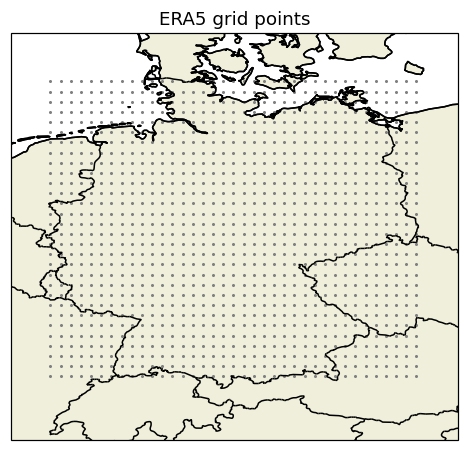

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# Frames Germany in the middle
ax.set_extent([5, 16, 46, 56])

# Plot the grid points
ax.scatter(lons, lats, color='grey', s=1, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_title('ERA5 grid points')

plt.show()

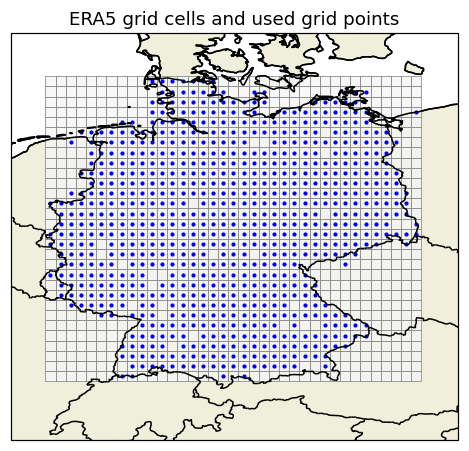

In [26]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([5, 16, 46, 56])

grid_width = np.mean(np.diff(lons[0,:]))
grid_height = np.mean(np.diff(lats[:,0]))


# Draw the grid cells centered on each grid point
for i in range(lons.shape[0]):
    for j in range(lons.shape[1]):
        # Compute the bottom-left corner of the cell
        lower_left_x = lons[i, j] - grid_width / 2
        lower_left_y = lats[i, j] - grid_height / 2
        rect = mpatches.Rectangle((lower_left_x, lower_left_y), grid_width, grid_height,
                                  facecolor='whitesmoke', alpha=0.8, edgecolor='grey', linewidth=0.6, transform=ccrs.PlateCarree())
        ax.add_patch(rect)
        
        
# Plot the grid points
# ax.scatter(lons, lats, color='grey', s=0.5, transform=ccrs.PlateCarree())


# Find the closest grid center for each point in used_grid_points and plot it
for point in used_grid_points:
    # Find the index of the nearest latitude
    idx_lat = np.abs(lats[:, 0] - point[0]).argmin()
    
    # Find the index of the nearest longitude
    idx_lon = np.abs(lons[0, :] - point[1]).argmin()

    # Plot at the grid center
    ax.scatter(lons[idx_lat, idx_lon], lats[idx_lat, idx_lon], color='blue', s=3, transform=ccrs.PlateCarree())
    
    
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_title('ERA5 grid cells and used grid points')

# ax.legend(loc='upper right')

plt.show()